### **Mục lục**
##### [**1. Giới thiệu**](#01)
##### [**2. Mục tiêu**](#02)
##### [**3. Thực hành**](#03)
* [Tiền xử lý](#3.1)
* [Lựa chọn mô hình](#3.2)
* [Đánh giá mô hình](#3.3)
* [Trả lời câu hỏi](#3.4)
##### [**4. Kết luận**](#04)


<a id="01"><h3><strong>1. Giới thiệu</strong></h3></a>


Mục này nằm trong chương 3 thuộc bài tập cuối kỳ bộ môn Khai phá dữ liệu lớp DDU1231. Thực hiện với bộ dữ liệu đặt phòng khách sạn (Hotel Booking Demand) dữ liệu được thu thập trong giai đoạn năm 2015 - 2017 từ hai khách sạn một là từ khách sạn thành phố và một khách sạn nghỉ dưỡng cả hai đều nằm ở Bồ Đào Nha

* Sinh viên thực hiện: **Nguyễn Đăng Tiến (3123580050)**
* Nhật ký thực hiện các chương
  * Chương 1: Thực hiện ngày 10/12/2025
  * Chương 2: Thực hiện ngày 11/12/2025
  * Chương 3: Thực hiện ngày 11/12/2025
  * Chương 4: Thực hiện ngày 11/12/2025

<a id="02"><h3><strong>2. Mục tiêu</strong></h3></a>


Thực hiện giải quyết các câu hỏi đặt ra trong bài tiểu luận:
1. Liệu khả năng hủy phòng có thể được dự đoán dựa trên những thông tin đặt phòng ban đầu hay không?
2. Các mô hình phân loại (Decision Tree, Random Forest, Logistic Regression, SVM ) cho kết quả như thế nào theo các thước đo Accuracy, Precision, Recall và F1-Score?

<a id="03"><h3><strong>3. Thực hành</strong></h3></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.shape

(119390, 32)

<a id="3.1"><h4><strong>3.1. Tiền xử lý</strong></h4></a>

#### **Mô tả các đặc trưng của bộ dữ liệu Hotel Booking Demand**
* **Đặc trưng về loại khách sạn**
  * `hotel` : Loại khách sạn: City Hotel hoặc Resort Hotel.
* **Đặc trưng về thời gian đặt phòng**
  * `is_canceled` : 1 = đặt phòng bị hủy, 0 = không hủy.
  * `lead_time` : Số ngày từ lúc đặt phòng đến ngày check-in.
  * `arrival_date_year` : Năm nhận phòng.
  * `arrival_date_month` : Tháng nhận phòng (January, February...).
  * `arrival_date_week_number` : Tuần trong năm (1–52).
  * `arrival_date_day_of_month` : Ngày trong tháng (1–31).
  * `stays_in_weekend_nights` : Số đêm lưu trú vào thứ 6–7.
  * `stays_in_week_nights` : Số đêm lưu trú vào các ngày trong tuần (Mon–Thu).
* **Đặc trưng về khách hàng**
  * `adults` : Số lượng người lớn.
  * `children` : Số lượng trẻ em.
  * `babies` : Số trẻ sơ sinh.
  * `meal` : Loại suất ăn (BB, HB, FB, SC…).
  * `country` : Quốc gia của khách (mã ISO).
  * `market_segment` : Phân khúc khách hàng (Online TA, Direct, Corporate…).
  * `distribution_channel` : Kênh phân phối (Direct, TA/TO…).
  * `is_repeated_guest` : 1 = khách quay lại, 0 = khách mới.
  * `previous_cancellations` : Số lần đặt trước đó bị hủy.
  * `previous_bookings_not_canceled` : Số đặt trước đó không bị hủy.
  * `reserved_room_type` : Loại phòng khách đặt.
  * `assigned_room_type` : Loại phòng được giao khi nhận phòng.
* **Đặc trưng về tài chính và giá phòng**
  * `booking_changes` : Số lần khách thay đổi đặt phòng.
  * `deposit_type` : Loại đặt cọc (No Deposit, Non Refund, Refundable).
  * `agent` : ID đại lý du lịch.
  * `company` : ID công ty (nếu đi theo đoàn công ty).
  * `adr` : Average Daily Rate: giá phòng trung bình mỗi đêm.
* **Đặc trưng về điều kiện đặt phòng**
  * `required_car_parking_spaces` : Số chỗ đỗ xe khách yêu cầu.
  * `total_of_special_requests` : Số yêu cầu đặc biệt (giường đôi, tầng cao…).
* **Đặc trưng về trạng thái đặt phòng**
  * `reservation_status` : Trạng thái: *Canceled*, *Check-Out*, *No-Show*.
  * `reservation_status_date` : Ngày ghi nhận trạng thái.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# -----------------------------
# 1. Xử lý missing values
# -----------------------------
df['children'].fillna(df['children'].median(), inplace=True) # Thay thế bằng median
df['babies'].fillna(df['babies'].median(), inplace=True) # Thay thế bằng Median
df['country'].fillna(df['country'].mode()[0], inplace=True) # Thay thế bằng Mode

# -----------------------------
# 2. Loại bỏ dữ liệu không hợp lệ
# -----------------------------
df = df[(df['adults'] + df['children'] + df['babies']) > 0] # Loại bỏ phòng không có khách

# -----------------------------
# 3. Outlier Filtering
# -----------------------------
def filter_by_quantile(df, col, low=0.005, high=0.995):
    q_low = df[col].quantile(low)
    q_high = df[col].quantile(high)
    return df[df[col].between(q_low, q_high)]

for col in ['adr', 'lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights',
            'children', 'babies', 'adults']:
    df = filter_by_quantile(df, col)

# -----------------------------
# 4. Feature Engineering
# -----------------------------

# Tổng số ngày lưu trú / tổng số khách
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights'] # Tổng số đêm ở lại
df['total_guests'] = df['adults'] + df['children'] + df['babies'] # Tổng số khách

# Các biến dự báo mạnh
df['is_family_trip'] = (df['children'] + df['babies'] > 0).astype(int) # Chuyến đi gia đình hay không
df['has_previous'] = (df['previous_cancellations'] > 0).astype(int) # Có quay lại không
df['adr_per_guest'] = df['adr'] / df['total_guests'] # Gía phòng trung bình trên một người

# Phân nhóm lead time
df['lead_time_bucket'] = pd.cut(
    df['lead_time'],
    bins=[0, 30, 90, 180, 365, df['lead_time'].max()],
    labels=['0-30', '30-90', '90-180', '180-365', '365+'] # Nhóm đặt phòng trước
)

# Chuyển tháng sang số
df['arrival_month_num'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

# Tạo biến season
def get_season(month):
    if month in [12,1,2]: return 'Winter'
    if month in [3,4,5]: return 'Spring'
    if month in [6,7,8]: return 'Summer'
    return 'Fall'

df['season'] = df['arrival_month_num'].apply(get_season) # Mùa du lịch

# Tạo biến arrival weekday
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + "-" +
    df['arrival_month_num'].astype(str) + "-" +
    df['arrival_date_day_of_month'].astype(str)
)
df['arrival_weekday'] = df['arrival_date'].dt.weekday # Ngày trong tháng

# Xóa cột arrival_date vì không dùng cho model
df.drop(['arrival_date'], axis=1, inplace=True)

# -------------------------------
# 5. Loại bỏ cột không cần thiết
# -------------------------------
df.drop([
    'reservation_status', # Tiết lộ trước thông tin khi huấn luyện
    'reservation_status_date',
    'assigned_room_type',
    'company',
    'agent'
], axis=1, inplace=True)

# -----------------------------
# 6. Tách dữ liệu
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Tách dữ liệu với tỉ lệ train/test 80 - 29
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric:", num_cols) # Xác định cột số
print("Categorical:", cat_cols) # Xác định cột phân loại

Numeric: ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stay', 'total_guests', 'is_family_trip', 'has_previous', 'adr_per_guest']
Categorical: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'lead_time_bucket', 'season']


<a id="3.2"><h4><strong>3.2. Lựa chọn mô hình</strong></h4></a>

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Pipeline cho cột phân loại: Imputer -> OrdinalEncoder
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

# Pipeline cho cột số: Imputer -> passthrough
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

rf_preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_pipeline, cat_cols),
        ("num", num_pipeline, num_cols),
    ]
)

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=10,
    max_features='sqrt',
    max_samples=0.8,
    class_weight='balanced',
    random_state=42
)

rf_pipeline = Pipeline(steps=[
    ("preprocess", rf_preprocessor),
    ("model", rf_clf)
])

rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'custome...
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests',
                                                   'total_stay', 'total_guests',
                                                   'is_family_trip',
                                                   'has_previous',
                                                   'adr_per_guest'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_samples=0.8, min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [ ]:
# -----------------------------------
# 2. Xây dựng mô hình Decision Tree
# -----------------------------------
from sklearn.tree import DecisionTreeClassifier

dt_preprocessor = rf_preprocessor  # dùng chung

dt_clf = DecisionTreeClassifier(
    criterion="gini",       # hoặc "entropy"
    max_depth=8,            # 6–12 là khoảng hay dùng
    min_samples_split=20,   # tránh tách quá vụn
    min_samples_leaf=10,    # mỗi lá phải có >= 10 mẫu
    max_features="sqrt",    # chọn ngẫu nhiên subset feature
    class_weight="balanced",
    random_state=42
)

dt_pipeline = Pipeline(steps=[
    ("preprocess", dt_preprocessor),
    ("model", dt_clf)
])

dt_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'custome...
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests',
                                                   'total_stay', 'total_guests',
                                                   'is_family_trip',
                                                   'has_previous',
                                                   'adr_per_guest'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                                        max_features='sqrt',
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline cho cột số (numeric)
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),   # hoặc "median"
    ("scaler", StandardScaler())
])

# Pipeline cho cột phân loại (categorical)
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Kết hợp
lin_preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)


In [ ]:
# -----------------------------------
# 3. Xây dựng mô hình Logistic Regression
# -----------------------------------
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(
    penalty="l2",
    C=1.0,                  # mức regularization trung bình
    solver="lbfgs",         # tốt cho dữ liệu vừa/lớn
    max_iter=1000,
    class_weight="balanced" # xử lý lệch lớp
)

lr_pipeline = Pipeline(steps=[
    ("preprocess", lin_preprocessor),
    ("model", lr_clf)
])

lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellatio...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'lead_time_bucket',
                                                   'season'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

<a id="3.3"><h4><strong>3.3. Đánh giá mô hình</strong></h4></a>

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
# -----------------------------------
# 1. Xây dựng mô hình Random Forest
# -----------------------------------

y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("Random Forest AUC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest AUC: 0.9215101011286044
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     14824
           1       0.79      0.79      0.79      8625

    accuracy                           0.84     23449
   macro avg       0.83      0.83      0.83     23449
weighted avg       0.84      0.84      0.84     23449



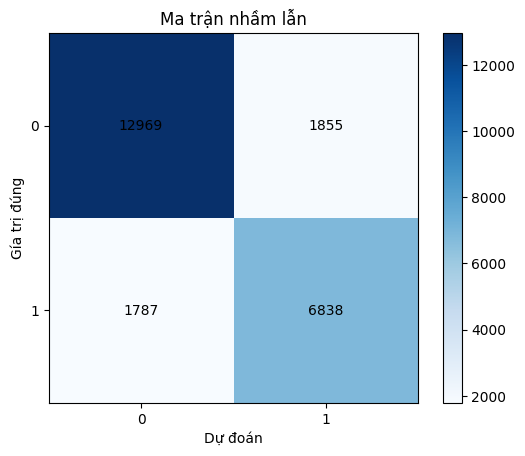

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
labels = np.unique(y_test)

plt.imshow(cm, cmap="Blues")
plt.title("Ma trận nhầm lẫn")
plt.xlabel("Dự đoán")
plt.ylabel("Gía trị đúng")

plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar()
plt.show()

AUC: 0.9215101011286044


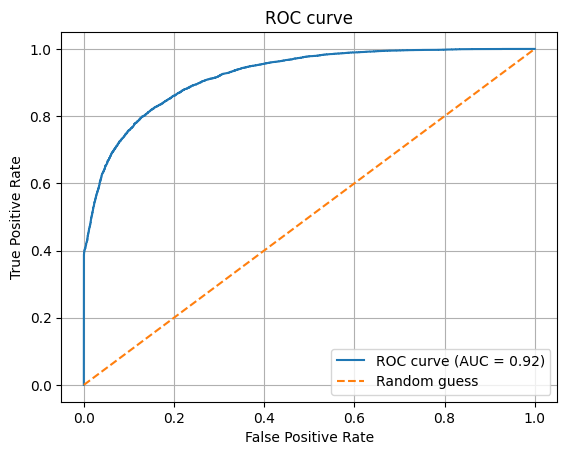

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
auc = roc_auc_score(y_test, y_proba_rf)

print("AUC:", auc)

# 6. Vẽ đường ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], '--', label='Random guess')  # đường chéo ngẫu nhiên
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# -----------------------------------
# 2. Đánh giá mô hình Decision Tree
# -----------------------------------
y_pred_dt = dt_pipeline.predict(X_test)
y_proba_dt = dt_pipeline.predict_proba(X_test)[:, 1]

print("Decision Tree AUC:", roc_auc_score(y_test, y_proba_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree AUC: 0.8379842754014251
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     14824
           1       0.69      0.67      0.68      8625

    accuracy                           0.77     23449
   macro avg       0.75      0.75      0.75     23449
weighted avg       0.77      0.77      0.77     23449



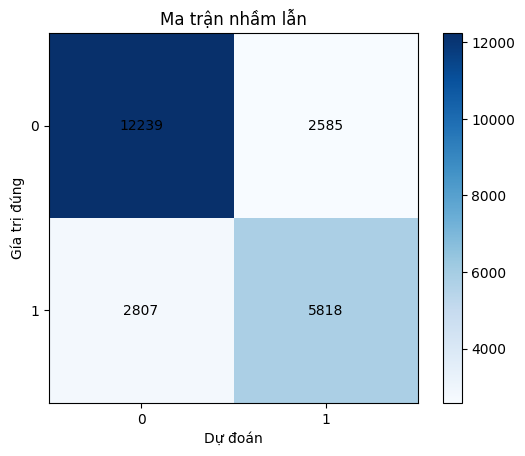

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)
labels = np.unique(y_test)

plt.imshow(cm, cmap="Blues")
plt.title("Ma trận nhầm lẫn")
plt.xlabel("Dự đoán")
plt.ylabel("Gía trị đúng")

plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar()
plt.show()

AUC: 0.8379842754014251


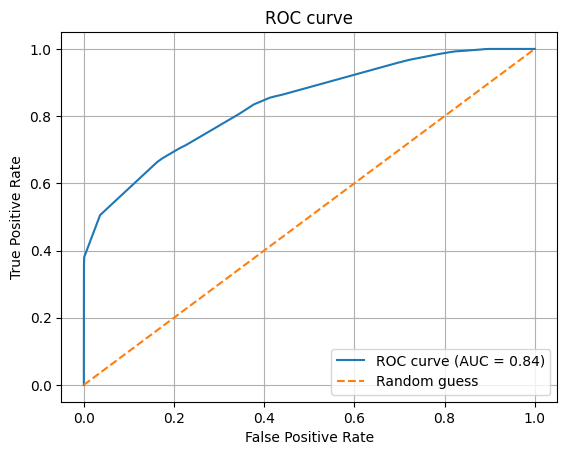

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)
auc = roc_auc_score(y_test, y_proba_dt)

print("AUC:", auc)

# 6. Vẽ đường ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], '--', label='Random guess')  # đường chéo ngẫu nhiên
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# -----------------------------------
# 3. Đánh giá mô hình Logistic Regression
# -----------------------------------
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

print("Logistic Regression AUC:", roc_auc_score(y_test, y_proba_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression AUC: 0.8946614694541557
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     14824
           1       0.73      0.78      0.75      8625

    accuracy                           0.81     23449
   macro avg       0.80      0.81      0.80     23449
weighted avg       0.82      0.81      0.81     23449



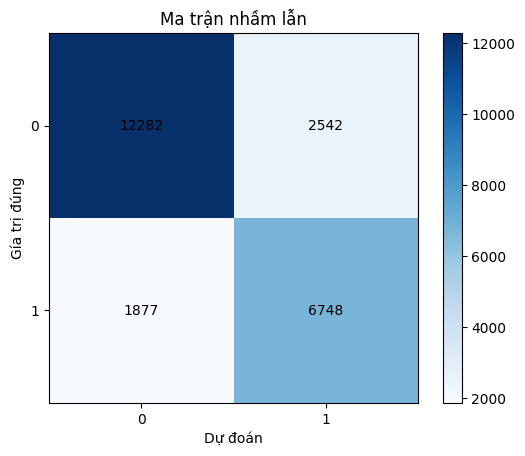

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
labels = np.unique(y_test)

plt.imshow(cm, cmap="Blues")
plt.title("Ma trận nhầm lẫn")
plt.xlabel("Dự đoán")
plt.ylabel("Gía trị đúng")

plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar()
plt.show()

AUC: 0.8946614694541557


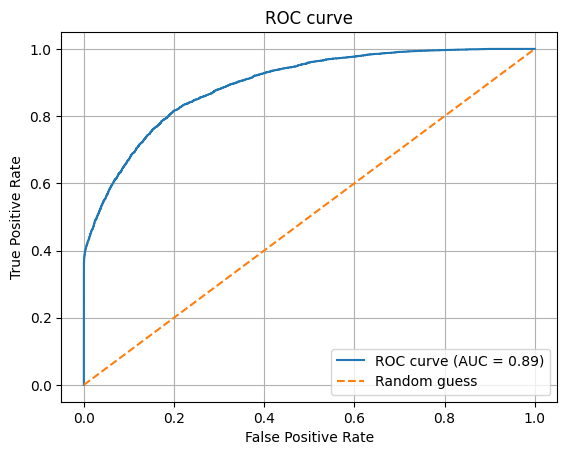

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
auc = roc_auc_score(y_test, y_proba_lr)

print("AUC:", auc)

# 6. Vẽ đường ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], '--', label='Random guess')  # đường chéo ngẫu nhiên
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<a id="04"><h3><strong>4. Kết luận</strong></h3></a>


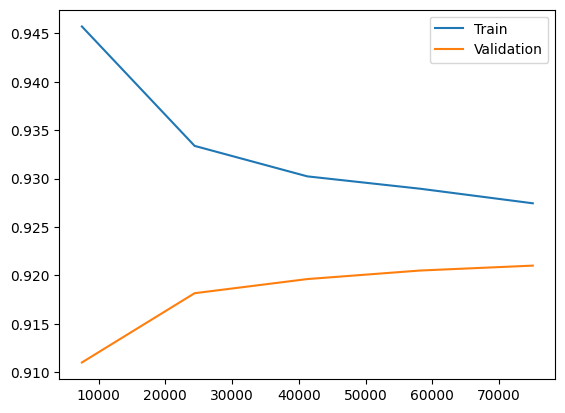

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    rf_pipeline,
    X_train, y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation")
plt.legend()
plt.show()


Tối ưu nhất chính là mô hình Random Forest đồng thời biểu đồ trên cũng cho ta thấy rằng mô hình không bị ovèrfitting tiếp đến ta có thể thực hiện tuning lựa chọn thanm số tối ưu cho mô hình và lựa chọn xem đặc trưng nào là quan trọng nhất trong quá trình dự đoán

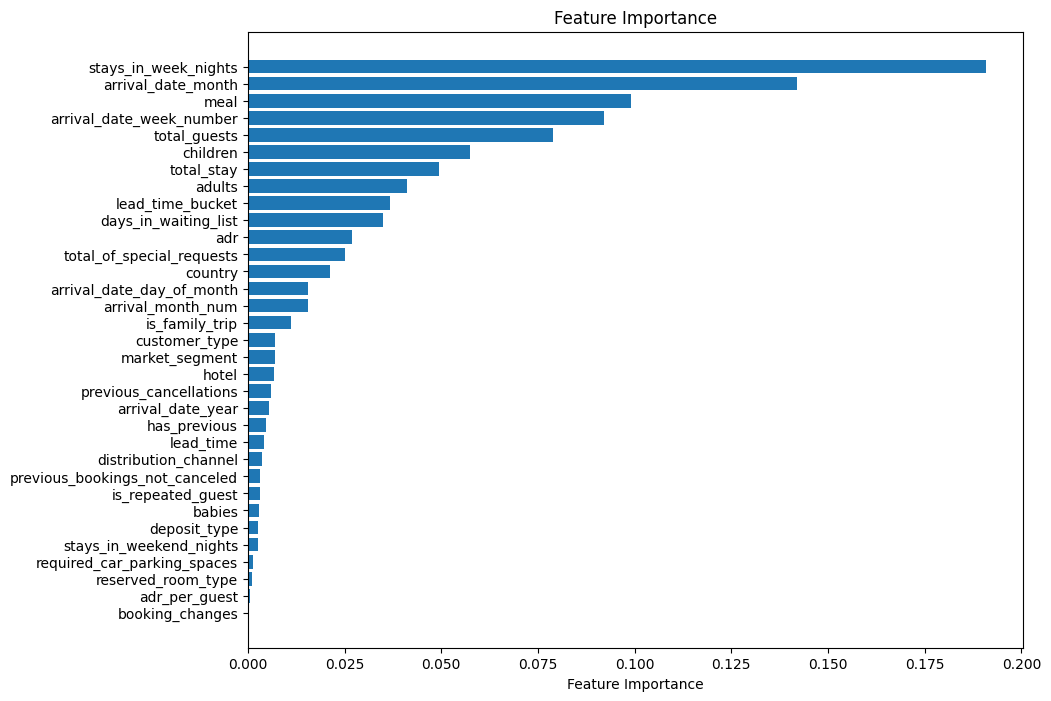

In [ ]:
importances = rf_clf.feature_importances_
feature_names = X.columns

# Sắp xếp
indices = np.argsort(importances)

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
plt.barh(feature_names[indices], importances[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.show()